##TALLER #1 
##Diego Alejandro Avila y Valentina González
##Finanzas Computacionales



####1. Escoja dos acciones de su preferencia en el mercado estadounidense. Para estas dos acciones descargue las series de precios diarios para el periodo Ene-21 a Dic-2022 usando pandas datareader. Con esta información:

####A.Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los resultados en una tabla.

In [ ]:
# Librerias
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
!pip install --quiet yfinance 
import yfinance as yf
from pandas_datareader import data as wb
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import math

In [ ]:
yf.pdr_override()

In [ ]:
activos=["AAPL","DIS"]
precios_diarios =wb.get_data_yahoo(activos,start="2021-01-01",end="2022-12-31")["Adj Close"]
retornos_diarios=np.log(precios_diarios/precios_diarios.shift(1)).dropna()

[*********************100%***********************]  2 of 2 completed


In [ ]:
retornos_diarios.mean() #Retornos diarios

AAPL    0.000032
DIS    -0.001425
dtype: float64

In [ ]:
retornos_mensuales=retornos_diarios.mean()*21 #Retornos diarios mensualizados
retornos_mensuales

AAPL    0.000667
DIS    -0.029929
dtype: float64

In [ ]:
retornos_anuales=retornos_diarios.mean()*252 #Retornos diarios anualizados
retornos_anuales

AAPL    0.008003
DIS    -0.359153
dtype: float64

In [ ]:
tabla_diario = {'Empresa':['AAPL','DIS'],
       'R_Diario':[retornos_diarios["AAPL"].mean(),retornos_diarios['DIS'].mean()],
       'R_Mensual':[retornos_mensuales["AAPL"].mean(),retornos_mensuales['DIS'].mean()],
        'R_Anual' :[retornos_anuales["AAPL"].mean(),retornos_anuales['DIS'].mean()],}
        
df=pd.DataFrame(tabla_diario)
df

,Empresa,R_Diario,R_Mensual,R_Anual
0,AAPL,0.000032,0.000667,0.008003
1,DIS,-0.001425,-0.029929,-0.359153


####2.Calcule los retornos esperados y volatilidades anualizadas.

In [ ]:
sigma_diario= retornos_diarios.std()
sigma_diario

AAPL    0.019412
DIS     0.019992
dtype: float64

In [ ]:
sigma_mensual= retornos_diarios.std()*np.sqrt(21) 
sigma_mensual

AAPL    0.088956
DIS     0.091614
dtype: float64

In [ ]:
sigma_anual= retornos_diarios.std()*np.sqrt(252) 
sigma_anual

AAPL    0.308152
DIS     0.317359
dtype: float64

#### C. Construya una tabla resumen con las estadísticas descriptivas de las series diarias (media, mediana, desv. estándar, curtosis, simetría) de los dos activos.

In [ ]:
retornos_diarios.kurt() #kurtosis

AAPL    1.143264
DIS     5.097278
dtype: float64

In [ ]:
retornos_diarios.skew() #simetría

AAPL    0.068949
DIS    -0.579021
dtype: float64

In [ ]:
tabla_resumen_diario = {'Empresa':['AAPL','DIS'],
       'Media':[retornos_diarios["AAPL"].mean(),retornos_diarios['DIS'].mean()],
       'mediana':[retornos_diarios["AAPL"].median(),retornos_diarios['DIS'].median()],
        'desv.estándar' :[retornos_diarios["AAPL"].std(),retornos_diarios['DIS'].std()],
        'curtosis' :[retornos_diarios["AAPL"].kurt(),retornos_diarios['DIS'].kurt()],
        'Simetría' :[retornos_diarios["AAPL"].skew(),retornos_diarios['DIS'].skew()]}
        
df=pd.DataFrame(tabla_resumen_diario)
df

,Empresa,Media,mediana,desv.estándar,curtosis,Simetría
0,AAPL,0.000032,0.000073,0.019412,1.143264,0.068949
1,DIS,-0.001425,-0.001267,0.019992,5.097278,-0.579021


#### D.Compare las distribuciones empíricas de los dos activos con la distribución teórica normal.

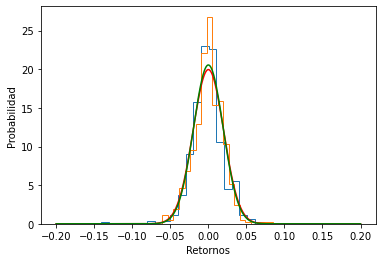

In [ ]:
from scipy.stats import norm
x= np.linspace(-0.2,0.2,num=1000) 
plt.hist(retornos_diarios["DIS"],density=True, histtype="step", bins=20); #Azul
plt.hist(retornos_diarios["AAPL"],density=True, histtype="step", bins=20); #Naranja
plt.xlabel("Retornos");
plt.ylabel("Probabilidad");
plt.plot(x,norm.pdf(x,scale=retornos_diarios["DIS"].std()),"r")
plt.plot(x,norm.pdf(x,scale=retornos_diarios["AAPL"].std()),"g")
plt.show();

####E. Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.

In [ ]:
retornos_diarios['DIS'].corr(retornos_diarios['AAPL'], method='kendall') #Correlación de Pearson

0.36685990568663474

In [ ]:
import scipy.stats as stats
stats.kendalltau(retornos_diarios['DIS'], retornos_diarios['AAPL']) #Rango de Kendall

KendalltauResult(correlation=0.36685990568663474, pvalue=1.0691146055454442e-34)

In [ ]:
retornos_diarios['DIS'].corr(retornos_diarios['AAPL'], method='spearman') #Rango de Spearman

0.5119969877042349

####2. Escoja 10 acciones de su preferencia en el mercado estadounidense. Para estas acciones descargue las series de precios mensuales para el periodo Dic-17 a Dic-2022. Con esta información:
####a. Calcule los retornos y volatilidades anualizadas.

In [ ]:
activos = ["MAT", "AMZN","NFLX","COST","HD","PFE","KO","F", "JNJ","MSFT"]
precios = wb.get_data_yahoo(activos,start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()
retornos

[*********************100%***********************]  10 of 10 completed


,AMZN,COST,F,HD,JNJ,KO,MAT,MSFT,NFLX,PFE
Date,,,,,,,,,,
2018-01-01,0.215627,0.045941,-0.129764,0.058260,-0.011011,0.036593,0.029470,0.104998,0.342245,0.022387
2018-02-01,0.041554,-0.020583,-0.009039,-0.097318,-0.062019,-0.096319,0.003781,-0.013137,0.075096,-0.019905
2018-03-01,-0.044003,-0.010351,0.043345,-0.022358,-0.007027,0.004847,-0.189897,-0.022336,0.013533,-0.013621
2018-04-01,0.078880,0.045289,0.014337,0.041830,-0.013038,0.003710,0.118205,0.024353,0.056315,0.031070
2018-05-01,0.039739,0.005463,0.040534,0.009425,-0.055843,-0.004872,0.047502,0.055327,0.118018,-0.018749
2018-06-01,0.042164,0.055672,-0.042447,0.050396,0.021666,0.019803,0.056371,0.001995,0.107312,0.019408
2018-07-01,0.044664,0.045508,-0.097661,0.012328,0.088137,0.070108,-0.034070,0.073021,-0.148389,0.095861
2018-08-01,0.124308,0.063849,-0.043433,0.016320,0.016242,-0.045183,-0.028117,0.057248,0.085796,0.039047
2018-09-01,-0.004836,0.009958,-0.024561,0.036396,0.032151,0.035702,0.017347,0.021839,0.017390,0.068083


In [ ]:
mu=retornos.mean()
mu

AMZN    0.006037
COST    0.016100
F       0.001939
HD      0.010480
JNJ     0.006112
KO      0.008096
MAT     0.002473
MSFT    0.018183
NFLX    0.007155
PFE     0.009691
dtype: float64

In [ ]:
mu=retornos.mean()*12
retornos_esperados=pd.DataFrame(mu)
retornos_esperados.rename(columns={0:"retornos"},inplace=True)
retornos_esperados

,retornos
AMZN,0.072449
COST,0.193198
F,0.023266
HD,0.125762
JNJ,0.073348
KO,0.097156
MAT,0.029675
MSFT,0.218191
NFLX,0.085856
PFE,0.116288


In [ ]:
sigma= retornos.std()*np.sqrt(12)
volatilidad_anualizada=pd.DataFrame(sigma)
volatilidad_anualizada.rename(columns={0:"volatilidad"},inplace=True)
volatilidad_anualizada

,volatilidad
AMZN,0.338207
COST,0.220505
F,0.431608
HD,0.246254
JNJ,0.177298
KO,0.197600
MAT,0.452844
MSFT,0.212894
NFLX,0.487256
PFE,0.252340


b. Construya una tabla en la que se muestre un ranqueo de los activos de acuerdo con su  retorno esperado. 

In [ ]:
retornos_ordenados=retornos_esperados.sort_values("retornos")
retornos_ordenados

,retornos
F,0.023266
MAT,0.029675
AMZN,0.072449
JNJ,0.073348
NFLX,0.085856
KO,0.097156
PFE,0.116288
HD,0.125762
COST,0.193198
MSFT,0.218191


3. Descargue la serie mensual de precios del índice estadounidense Rusell para el periodo  Dic-11 a Dic-2022. Con esta información calcule la volatilidad mensual y anualizada usando  las siguientes medidas: 

In [ ]:
indice = wb.get_data_yahoo("^RUT",start="2011-12-01",end="2022-12-31", interval="1Mo")["Adj Close"].dropna()
retornos = np.log(indice/indice.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


a. Desviación estándar 

In [ ]:
#volatilidad mensual
retornos.std()

0.05474479591479422

In [ ]:
#volatiliadad anual
retornos.std()*np.sqrt(252)

0.8690466933931815

b. Parkinson 

In [ ]:
indice = wb.get_data_yahoo("^RUT",start="2011-12-01",end="2022-12-31", interval="1Mo").dropna()

[*********************100%***********************]  1 of 1 completed


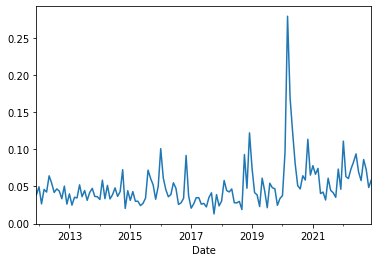

In [ ]:
lnHL = np.log(indice["High"]/indice["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot();

In [ ]:
(sigmaPark_d.mean())*np.sqrt(12)

0.1767113126308943

c. Garman-Klass  

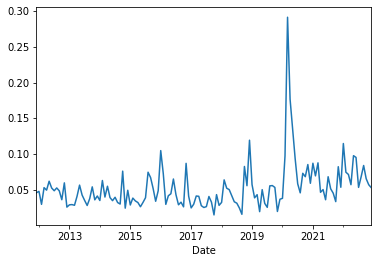

In [ ]:
lnHL = np.log(indice["High"]/indice["Low"]).dropna()
lnCO = np.log(indice["Close"]/indice["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot();

In [ ]:
(sigmaGK_d.mean())*np.sqrt(12)

0.1815139038491142

d. Volatilidad ponderada exponencial (EWMA) con una lambda de 0.94. 

In [ ]:
indice = yf.download("^RUT",start="2011-12-01",end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(indice/indice.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
Lambda = 0.94
def vol_ewma(retornos,Lambda):#implementacion de lo anteriormente programado
  k = len(retornos) 
  td = np.arange(k-1,-1,-1) 
  alpha = Lambda**td
  var_s= (retornos**2*alpha).sum()*(1-Lambda)
  vol_d=np.sqrt(var_s)
  return(vol_d)

In [ ]:
vol_ewma(retornos,Lambda=0.94)

0.06830769009655513

In [ ]:
(vol_ewma(retornos,Lambda=0.94))*np.sqrt(12)

0.23662477958980582